In [0]:
import gdown

In [0]:
url = "https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw"

In [0]:
gdown.download(url,'data1',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cZJu7L55oeE3qRpESnGSE_v6CV2NW9pw
To: /content/data1
74.6MB [00:01, 48.4MB/s]


'data1'

In [0]:
import zipfile 
with zipfile.ZipFile("data1",'r') as zip_ref:
   zip_ref.extractall('data2/')

In [0]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


# 5 Convolution / dropout=.25 / Adam / lr =.001, -- 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 493s 4s/step - loss: 2.3550 - acc: 0.2859 - val_loss: 1.0369 - val_acc: 0.6545
Epoch 2/15
125/125 [==============================] - 463s 4s/step - loss: 0.6579 - acc: 0.7848 - val_loss: 0.4418 - val_acc: 0.8614
Epoch 3/15
125/125 [==============================] - 467s 4s/step - loss: 0.2975 - acc: 0.9120 - val_loss: 0.1156 - val_acc: 0.9641
Epoch 4/15
125/125 [==============================] - 470s 4s/step - loss: 0.1754 - acc: 0.9465 - val_loss: 0.0766 - val_acc: 0.9793
Epoch 5/15
125/125 [==============================] - 471s 4s/step - loss: 0.1366 - acc: 0.9587 - val_loss: 0.1027 - val_acc: 0.9748
Epoch 6/15
125/125 [==============================] - 470s 4s/step - loss: 0.0975 - acc: 0.9692 - val_loss: 0.0329 - val_acc: 0.9894
Epoch 7/15
125/125 [==============================] - 467s 4s/step - loss: 0.0757 - acc: 0.9800 - val_loss: 0.0147 - 

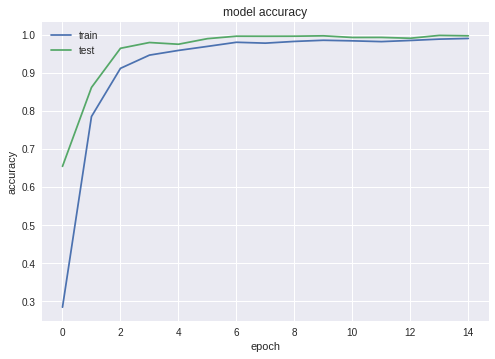

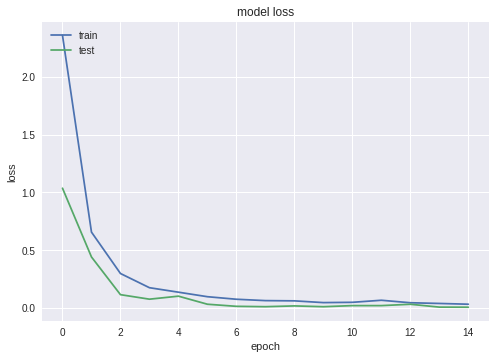

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, 
                          beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 5 Convolution / dropout=.5 / Adam / lr =.001, --

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 498s 4s/step - loss: 2.4842 - acc: 0.2417 - val_loss: 1.0951 - val_acc: 0.6720
Epoch 2/15
125/125 [==============================] - 474s 4s/step - loss: 0.9348 - acc: 0.7013 - val_loss: 0.2448 - val_acc: 0.9318
Epoch 3/15
125/125 [==============================] - 475s 4s/step - loss: 0.4173 - acc: 0.8690 - val_loss: 0.1639 - val_acc: 0.9517
Epoch 4/15
125/125 [==============================] - 475s 4s/step - loss: 0.2698 - acc: 0.9150 - val_loss: 0.0818 - val_acc: 0.9801
Epoch 5/15
125/125 [==============================] - 475s 4s/step - loss: 0.1714 - acc: 0.9445 - val_loss: 0.0780 - val_acc: 0.9750
Epoch 6/15
125/125 [==============================] - 477s 4s/step - loss: 0.1378 - acc: 0.9593 - val_loss: 0.0228 - val_acc: 0.9958
Epoch 7/15
125/125 [==============================] - 475s 4s/step - loss: 0.1047 - acc: 0.9680 - val_loss: 0.0287 - 

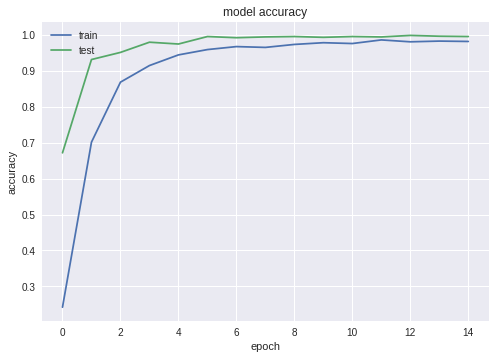

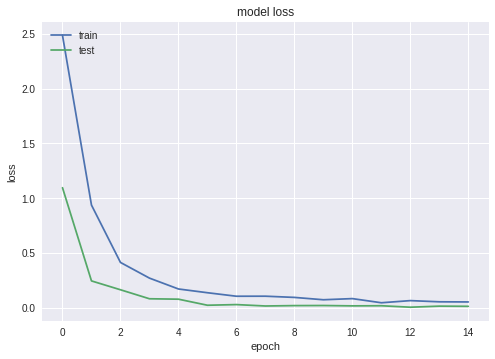

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, 
                          beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 5 conv / dropout=.25 / SGD(momentum, nesterov) / lr=.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 505s 4s/step - loss: 3.0156 - acc: 0.1173 - val_loss: 2.3015 - val_acc: 0.3591
Epoch 2/15
125/125 [==============================] - 476s 4s/step - loss: 1.5770 - acc: 0.5184 - val_loss: 0.7416 - val_acc: 0.7580
Epoch 3/15
125/125 [==============================] - 481s 4s/step - loss: 0.6783 - acc: 0.7815 - val_loss: 0.3462 - val_acc: 0.9013
Epoch 4/15
125/125 [==============================] - 480s 4s/step - loss: 0.3941 - acc: 0.8743 - val_loss: 0.1734 - val_acc: 0.9454
Epoch 5/15
125/125 [==============================] - 479s 4s/step - loss: 0.2512 - acc: 0.9216 - val_loss: 0.0761 - val_acc: 0.9808
Epoch 6/15
125/125 [==============================] - 481s 4s/step - loss: 0.1910 - acc: 0.9395 - val_loss: 0.1055 - val_acc: 0.9728
Epoch 7/15
125/125 [==============================] - 480s 4s/step - loss: 0.1464 - acc: 0.9518 - val_loss: 0.0404 - 

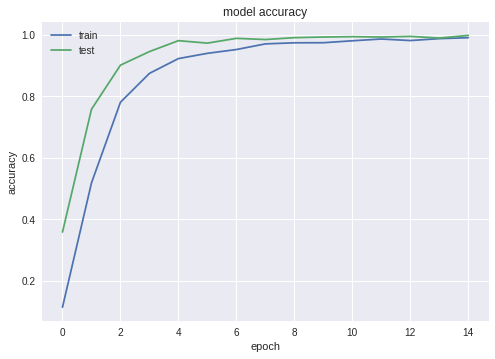

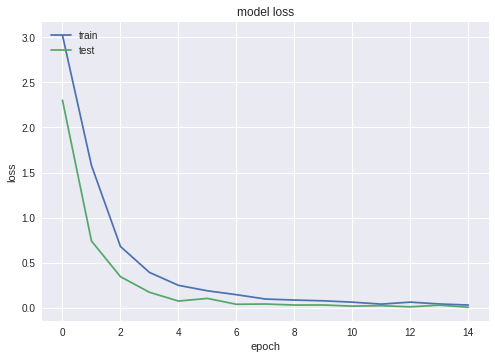

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# # 5 conv / dropout=.5 / SGD(momentum, nesterov) / lr=.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(640, 480,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


Found 3947 images belonging to 24 classes.
Found 953 images belonging to 24 classes.
Epoch 1/15
125/125 [==============================] - 466s 4s/step - loss: 3.1590 - acc: 0.0498 - val_loss: 3.1235 - val_acc: 0.0695
Epoch 2/15
125/125 [==============================] - 431s 3s/step - loss: 2.4370 - acc: 0.2628 - val_loss: 1.5406 - val_acc: 0.5823
Epoch 3/15
125/125 [==============================] - 422s 3s/step - loss: 1.2402 - acc: 0.6120 - val_loss: 0.5658 - val_acc: 0.8625
Epoch 4/15
125/125 [==============================] - 419s 3s/step - loss: 0.6803 - acc: 0.7890 - val_loss: 0.2194 - val_acc: 0.9362
Epoch 5/15
125/125 [==============================] - 416s 3s/step - loss: 0.4326 - acc: 0.8633 - val_loss: 0.1149 - val_acc: 0.9652
Epoch 6/15
125/125 [==============================] - 414s 3s/step - loss: 0.3117 - acc: 0.9030 - val_loss: 0.0779 - val_acc: 0.9821
Epoch 7/15
125/125 [==============================] - 414s 3s/step - loss: 0.2530 - acc: 0.9203 - val_loss: 0.0700 - 

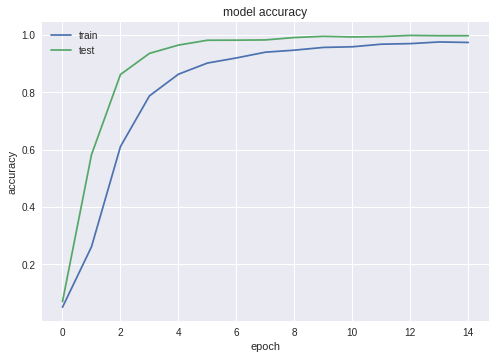

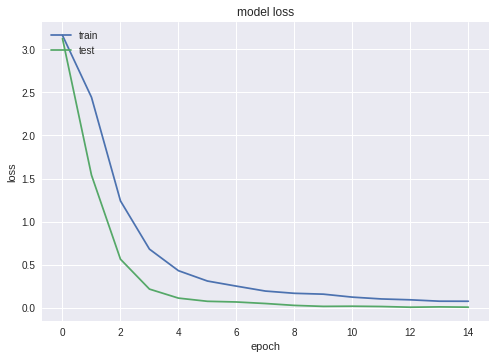

In [0]:
# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer 
classifier.add(Convolution2D(32, 3,  3, input_shape = (640, 480, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

# Adding third convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

# Adding fourth convolution layer
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(3,2)))

#Adding 5th Concolution Layer
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(24, activation = 'softmax'))

#Compiling The CNN
classifier.compile(
              optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data2/data1/train1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'data2/data1/test1',
        target_size=(640, 480),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=125,
        epochs=15,
        validation_data = test_set,
        validation_steps = 650
      )

#Saving the model
#import h5py
#classifier.save('E:\\M.Tech_Project\\Trained_model.h5')
#print(model.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
